In [4]:
import json
import time
import re
import os
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.transforms import Bbox
import seaborn as sns

with open('topic_tweet_count.json', 'r') as f:
    topic_tweet_count = json.load(f)

topic_tweet_count = {int(topic_id): int(count) for (topic_id, count) in topic_tweet_count.items()}

with open('topic_aggregated_emotions.json', 'r') as f:
    topic_aggregated_emotions = json.load(f)

topic_aggregated_emotions = {int(topic_id): emotions for (topic_id, emotions) in topic_aggregated_emotions.items()}

topics_to_show = [0, 1, 2, 3, 6, 8, 9, 10, 16]
topic_names = {
  0: 'Public Health and Social Values',
  1: 'Day-to-Day Life',
  2: 'Food',
  3: 'Politics',
  6: 'Professional Achievements',
  8: 'Medical Studies and COVID-19 Information',
  9: 'Loss and Consolation',
  10: 'Account Promotion',
  16: 'Picture Challenges'
}

labels = ['Anger',
          'Disgust',
          'Fear',
          'Joy',
          'Sadness',
          'Surprise']
colors = ['red',
          'brown', 
          'orange', 
          'limegreen', 
          'grey', 
          'deepskyblue']

c:\users\eli wolfson\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  if __name__ == '__main__':


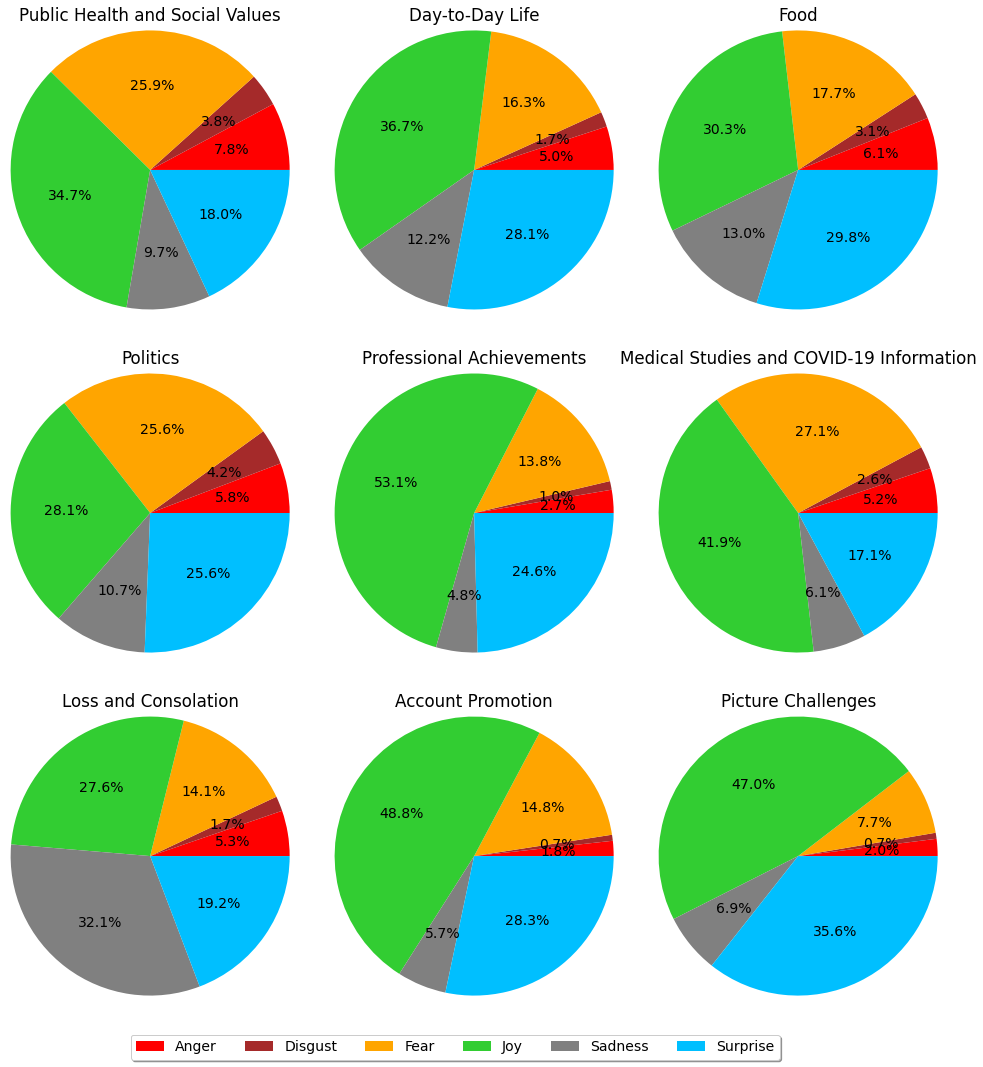

In [3]:
mpl.rcParams['font.size'] = 14.0

nrows = 3
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

for i, topic_id in enumerate(topics_to_show):
    axes[int(i / ncols)][i % ncols].pie(topic_aggregated_emotions[topic_id].values(), colors=colors, autopct='%1.1f%%', textprops={'fontsize': 14}, shadow=False, radius=1.22)
    axes[int(i / ncols)][i % ncols].set_title(f'{topic_names[topic_id]}')

plt.legend(labels, loc='upper center', bbox_to_anchor=(-0.7, -0.1), fancybox=True, shadow=True, ncol=len(labels))

plt.subplots_adjust(left=0.05,
                    bottom=0.05, 
                    right=0.95, 
                    top=0.95, 
                    wspace=0, 
                    hspace=0.2)
plt.savefig('per_topic_emotions_{}.png'.format('_'.join([str(i) for i in topics_to_show])))

## Stacked bar chart

In [5]:
import pandas as pd

df = pd.DataFrame(columns=labels)

for topic_id in topic_names:
    df.loc[topic_id] = topic_aggregated_emotions[topic_id]

In [12]:
sentiment_sorted_topic_names = ['Politics', 'Food', 'Medical Studies and COVID-19 Information',
                               'Loss and Consolation', 'Public Health and Social Values', 'Day-to-Day Life',
                               'Account Promotion', 'Picture Challenges', 'Professional Achievements']
sentiment_sorted_topic_ids = [3, 2, 8, 9, 0, 1, 10, 16, 6]

In [17]:
df = df.reindex(sentiment_sorted_topic_ids)

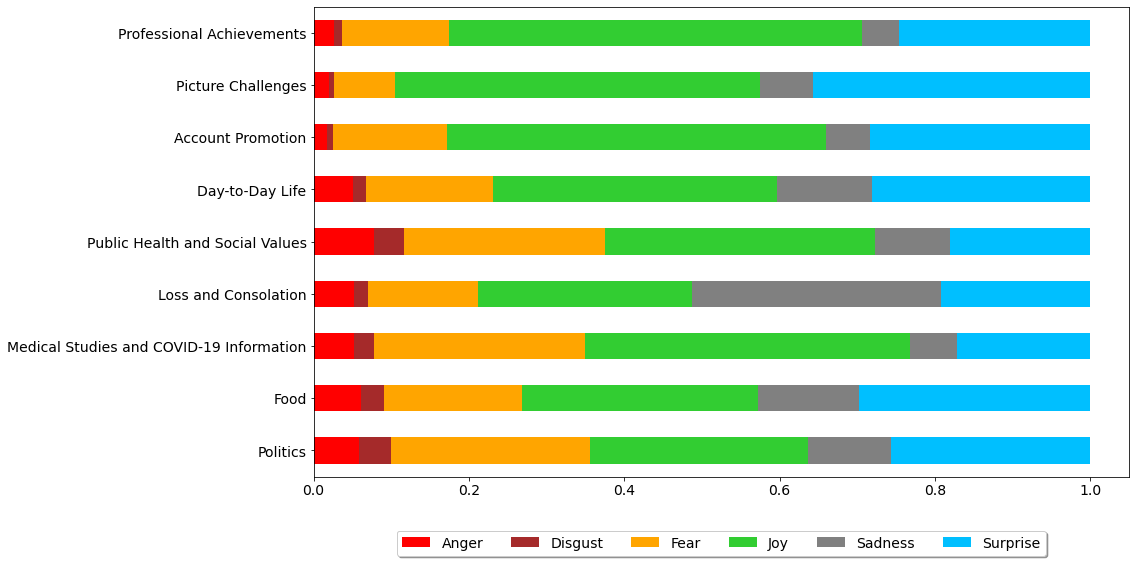

In [18]:
mpl.rcParams['font.size'] = 14.0
df.plot.barh(stacked=True, figsize=(16, 8), color=colors)
plt.yticks(list(range(len(topic_names))), sentiment_sorted_topic_names)
plt.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=len(labels))
plt.tight_layout()
plt.savefig('stacked_barchart_emotions_relevant_topics.png')
plt.show()